<a href="https://colab.research.google.com/github/malaireumarianna/DS_projects/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!git clone https://github.com/malaireumarianna/DS_projects.git

fatal: destination path 'DS_projects' already exists and is not an empty directory.


In [29]:
!pip install umap-learn

In [52]:
import pandas as pd


bank_full = pd.read_csv("/content/DS_projects/EDA/bank-additional-full.csv",  sep=';')

#bank_names = pd.read_csv("/content/DS_projects/EDA/bank-additional-names.txt",   sep=';')

In [37]:
bank_full.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
print(bank_full.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


All the statistics is printed below, but my insights will be always printed above the code.


## **1. Univariate Analysis**

Descriptive Statistics




From dataset overview below we see that we have 10 numerical attributes and 11 categorical. And there are non Nans in numerical features.

In [6]:
print("Dataset Overview:\n", bank_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Firstly, let's get some basic statistics of numerical attributes we have:


By printing the statistics of numerical values and their distribution plots, we can see some insights found:

As we see, majority of clients's age value holds within range from 32 to 47, this can also be seen on histogram below, which descriges age distribution. Older clients are contacted less often, I would assume that it's due to the drastic reduce in payment abbilities.
Most clients are contacted 1 to 3 times as we see from "campaign" attribute.
But it seems that most clients have not been contacted in previous campaign as from "previous" attribute. For "pdays" attribute large proportion of values are set to "999", indicating that many clients were not contacted before the campaign.
"cons.conf.idx" reflects to the quite pessimistic consumer confidence index, as mean value in negative, while the "cons.price.idx" shows quite stable and high value other the majority of data.

"duration" attribute indicates whatever the client could be interested in geting term deposit, I would assume that higher duration of a call correlates with higher interest in subcribing for term deposit. Data which lies above 25th percentile has quite high call duration which could result in high interest for majority of clients.

In [7]:
print("Descriptive Statistics:")
print(bank_full.describe())

Descriptive Statistics:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.5

Visualizing numerical distributions, to see clearer where the majority of values lie.

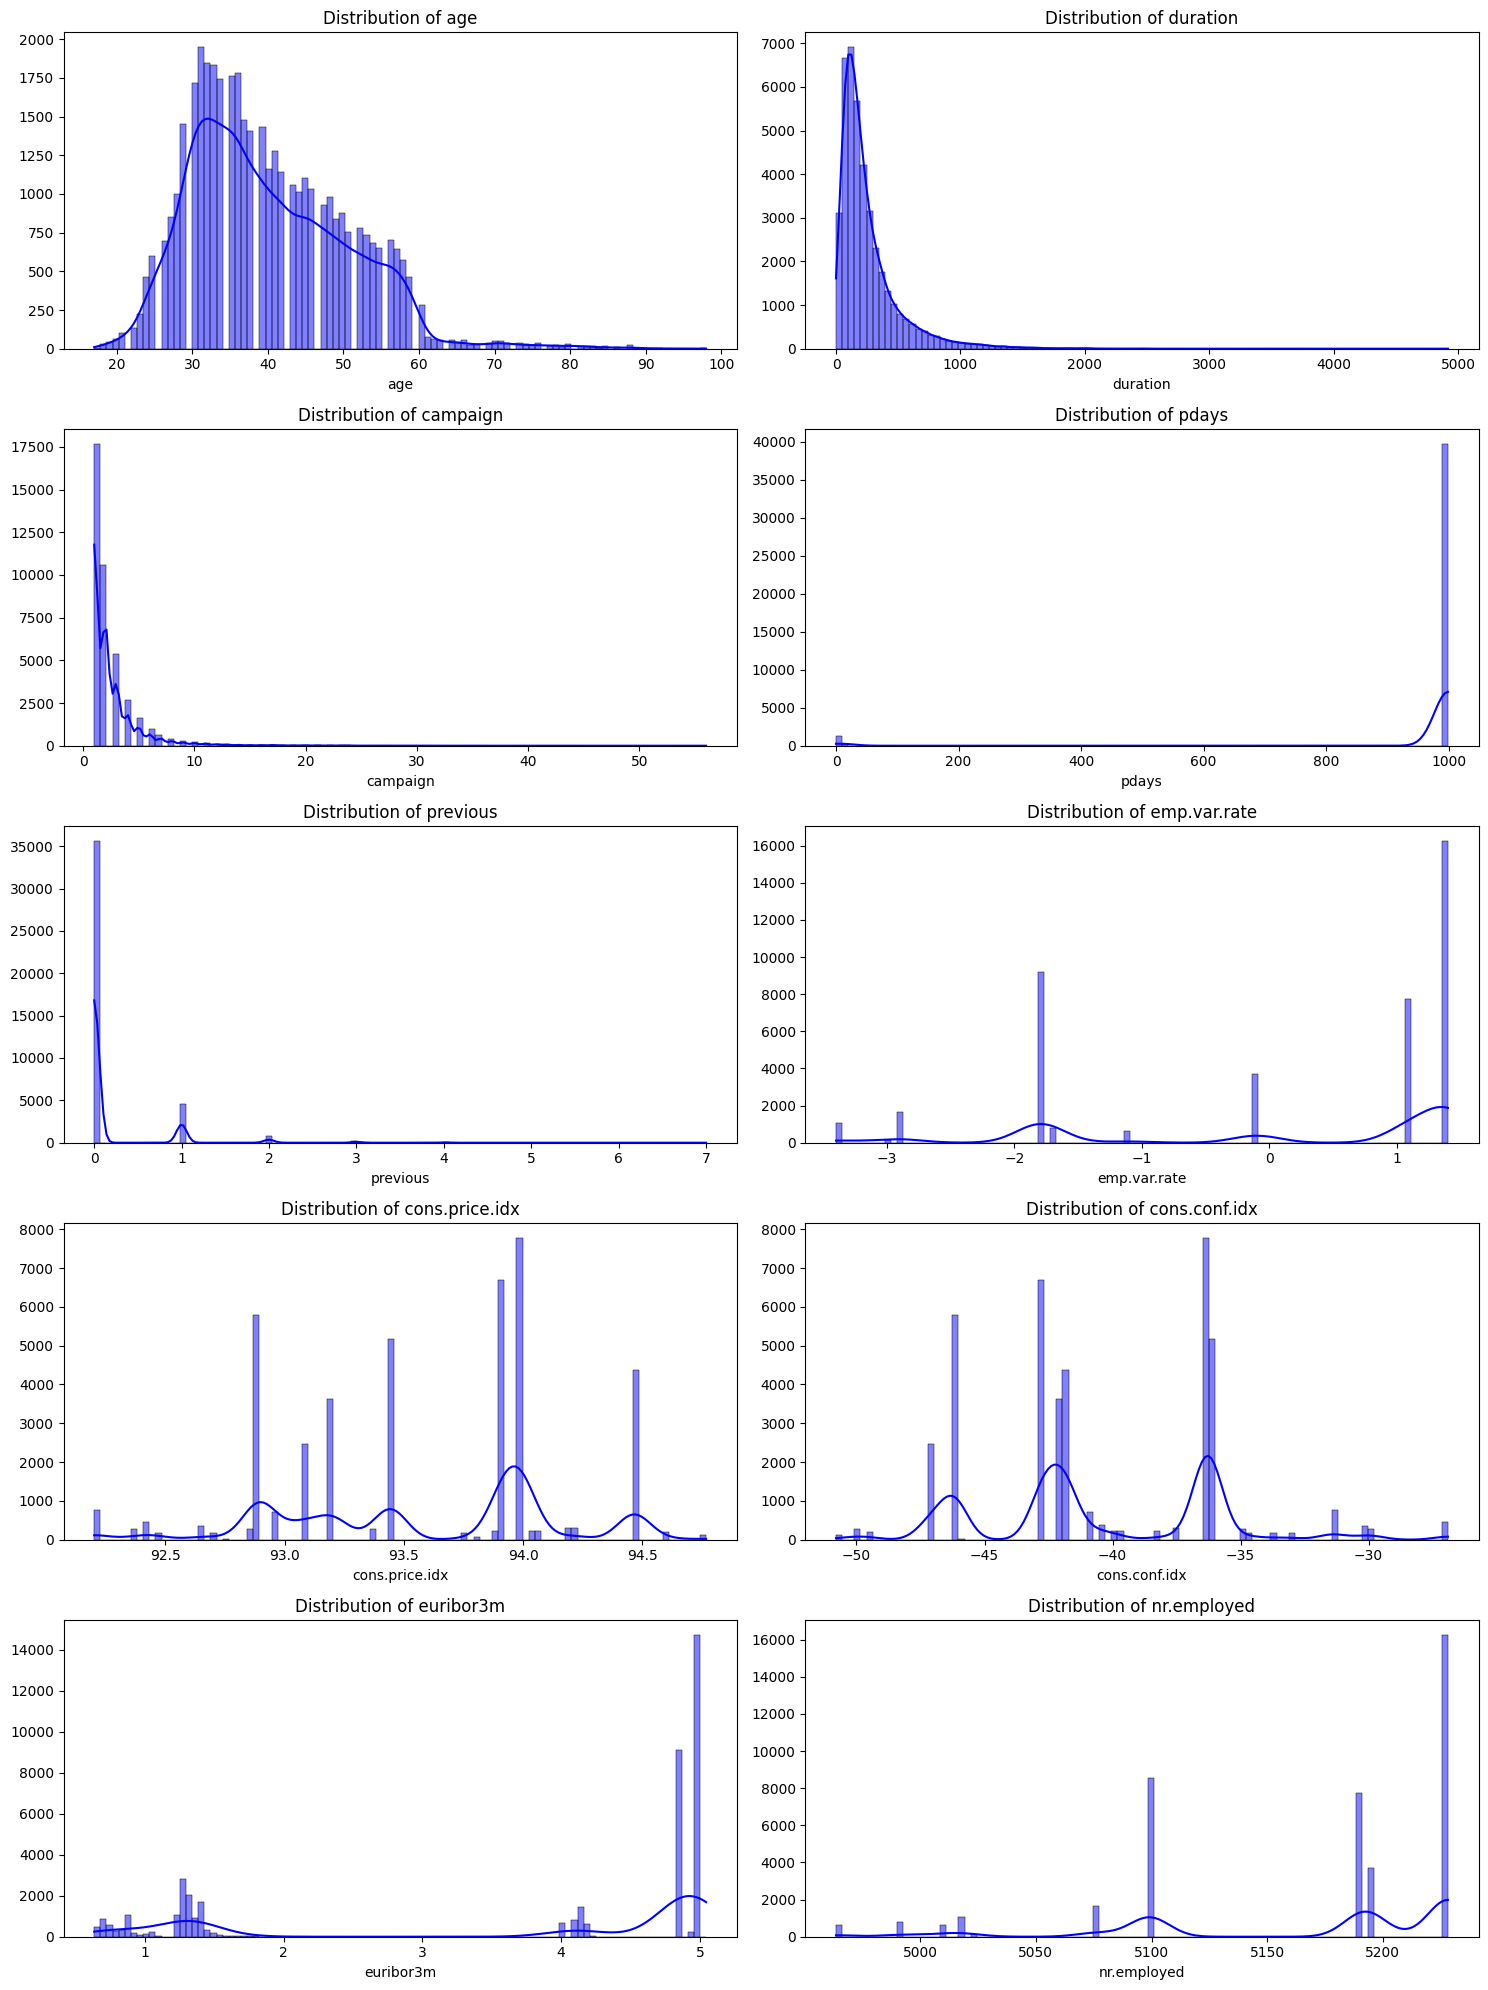

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_features = bank_full.select_dtypes(include=['int64', 'float64']).columns

num_plots = len(numerical_features)
rows, cols = 5, 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    if i < len(numerical_features):
        #sns.histplot(y=bank_full[feature], order=bank_full[feature].value_counts().index, ax=axes[i])
        sns.histplot(bank_full[feature], kde=True, bins=100, color='blue', ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_ylabel('')
    else:
        axes[i].axis('off')
plt.tight_layout()
plt.show()


Print some statistics for categorical attributes.


As we see most common jobs "admin.", "blue-collar," and "technician" dominate in the dataset. Categories like "student," "housemaid," and "unemployed" are seen least often.
Significant portion of clients is married.
Majority of clients don't have credit in default, don't have personal loan, but have house loan.
Majority have university degree or at least finished high school education.
The majority of clients were contacted via "cellular," with fewer contacted via "telephone." Previous campaign outcome "Poutcome" shows in major cases "nonexistent" indicating no prior campaign. The outcome attribute "y" indicates whatever client subscribed a term deposit, distribution shows that majority of clients didn't subscribe.

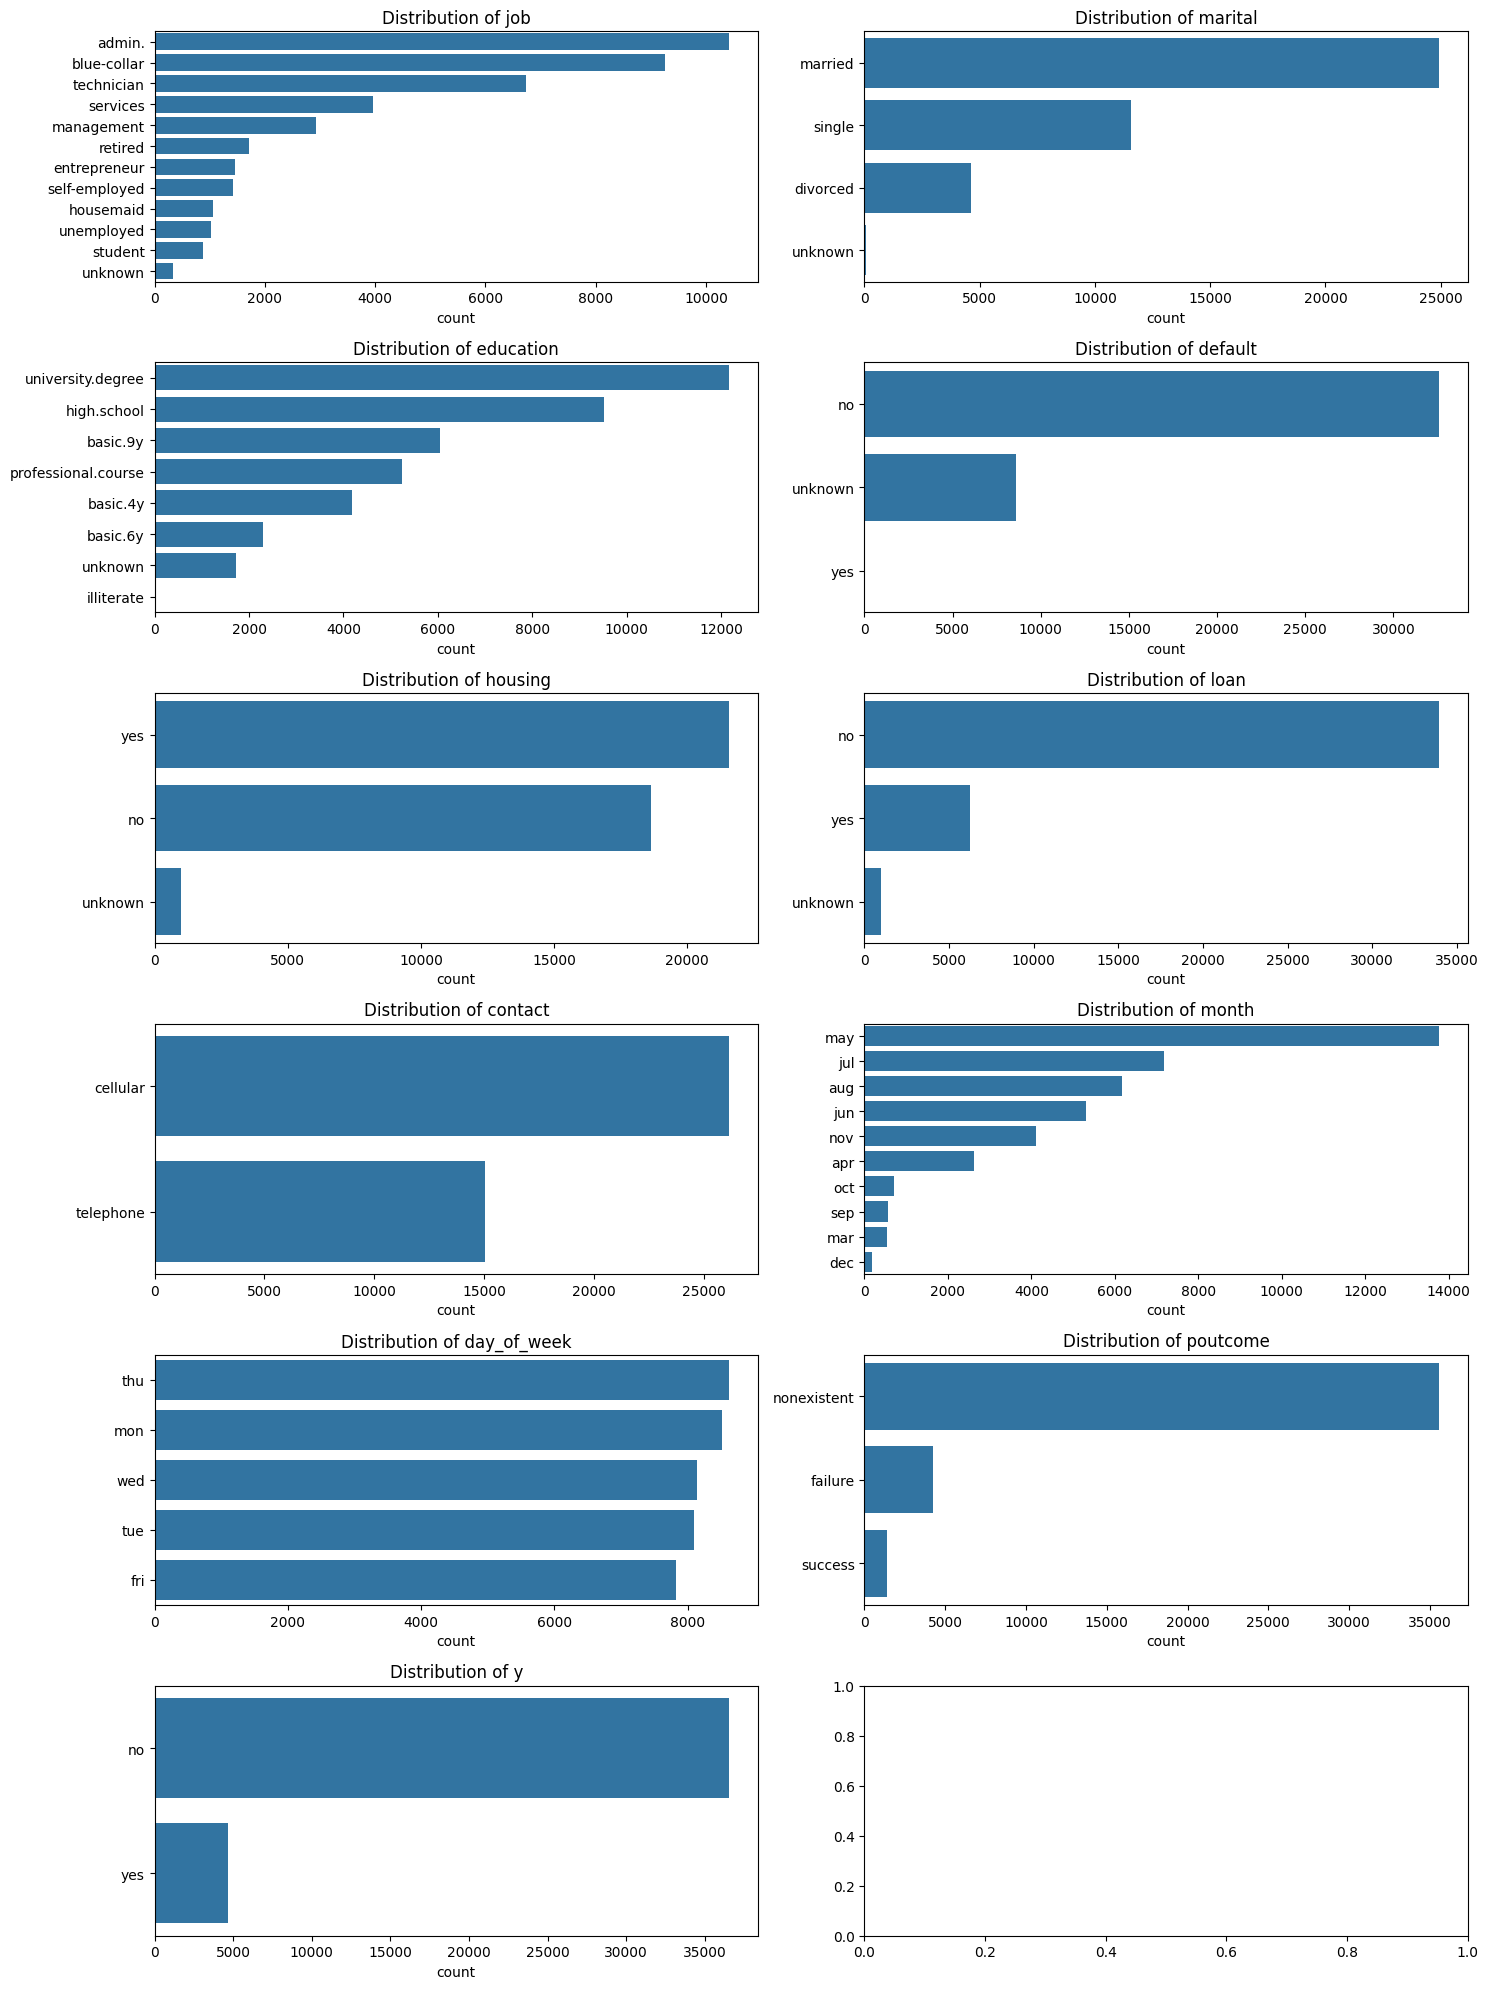

In [9]:
# Plot value counts for categorical features
categorical_features = bank_full.select_dtypes(include=['object']).columns
num_plots = len(categorical_features)
rows, cols = 6, 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    if i < len(categorical_features):
        sns.countplot(y=bank_full[feature], order=bank_full[feature].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_ylabel('')
    else:
        axes[i].axis('off')
plt.tight_layout()
plt.show()

#**2. Multivariate Analysis**

Print cross-tables for some selected pairs of features:


For "job"-"y" pair we can see that admin and blue-collar individuals show the highest subscription rates (y = yes).
Self-employed and unemployed jobs have low subscription.
Management roles hold around the average subscription.

For "marital"-"y" pair, married and single individuals show a higher subscription rate compared to divorced individuals.

"education"-"y"pair : Illiterate individuals have lowest subscription rate, while individuals with higher education have much higher subscription.
Basic education (4y, 6y, 9y) shows moderate subscription.

"default"-"y". pair : Individuals with no credit default have a higher subscription.
"housing"-"loan": Having a housing loan decreases subscription rates compared to those without.

"contact"-"y" : Cellular communication leads to higher subscription rates compared to telephone.

"day_of_week vs. y" and "month vs. y" pairs don't show significant insights in terms of importance of "month" or "day_of_week" features.|

"marital" and "loan" : significant part of individuals who have loan are married or single, and much less of them are divorced.




"emp.var.rate"-"y" pair: Subscription rates are highest  when the employment variation rate is zero, indicating stable employment conditions."

"job"-"education pair : as we see such jobs as admin, management and technitian require university degree. So, this can be use to impute some unknown values.

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


categorical_features = bank_full.select_dtypes(include='object').columns


# Define specific pairs for cross-tabulation
pairs = [
    ('job', 'y'),
    ('marital', 'y'),
    ('education', 'y'),
    ('default', 'y'),
    ('housing', 'y'),
    ('loan', 'y'),
    ('contact', 'y'),
    ('month', 'y'),
    ('day_of_week', 'y'),
    ('marital', 'loan'),
    ('education', 'housing'),
    ('job', 'default'),
    ('euribor3m', 'y'),
    ('emp.var.rate', 'y'),
    ('education', 'job')
]

# iterate over pairs and create cross-tabs
for feature1, feature2 in pairs:
    if feature1 in bank_full.columns and feature2 in bank_full.columns:
        print(f"Cross Tabulation: {feature1} vs. {feature2}")

        # if either feature is numeric, bin the values into intervals
        if bank_full[feature1].dtype != 'object':
            bank_full[feature1] = pd.cut(bank_full[feature1], bins=5, labels=False)

        if bank_full[feature2].dtype != 'object':
            bank_full[feature2] = pd.cut(bank_full[feature2], bins=5, labels=False)

        # create the cross-tabulation
        cross_tab = pd.crosstab(bank_full[feature1], bank_full[feature2])

        print(cross_tab)
        print("\n")
    else:


        print(f"Features {feature1} or {feature2} not found in the dataset.\n")


Cross Tabulation: job vs. y
y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


Cross Tabulation: marital vs. y
y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12


Cross Tabulation: education vs. y
y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251


Cross Tabulation: default vs. y
y           no   yes
default             


Cross tabs to analyse influence of few features in "y".

university.degree holders show higher subscription, especially when they have housing loans. However, a significant portion still does not subscribe.
Individuals with basic.4y, basic.6y, and basic.9y education levels have higher counts of not subscribing in  "y". Among these groups, those with housing loansare slightly more likely to subscribe compared to those without loans.

Second cross tab shows that people with basic.4y, basic.6y, and basic.9y education levels without loans show a slightly higher subscription compared to those with loans.
Loan and housing loan ownership also influence the subscription decision.


In [60]:
import pandas as pd
import numpy as np

# creating the crosstab
crosstab = pd.crosstab(
    [bank_full['education'], bank_full['housing']],
    bank_full['y'],

    margins=True,
    margins_name='Total'
)


crosstab1 = pd.crosstab(
    [bank_full['education'], bank_full['loan']],
    bank_full['y'],

    margins=True,
    margins_name='Total'
)

crosstab.reset_index(inplace=True)

# Displaying the crosstab
print("Cross Tabulation: Education vs. Housing and y")
print(crosstab)

print("Cross Tabulation: Education vs. Loan and y")
print(crosstab1)

Cross Tabulation: Education vs. Housing and y
y             education  housing     no   yes  Total
0              basic.4y       no   1763   192   1955
1              basic.4y  unknown    106    11    117
2              basic.4y      yes   1879   225   2104
3              basic.6y       no    985    85   1070
4              basic.6y  unknown     53     7     60
5              basic.6y      yes   1066    96   1162
6              basic.9y       no   2527   216   2743
7              basic.9y  unknown    138    13    151
8              basic.9y      yes   2907   244   3151
9           high.school       no   3902   461   4363
10          high.school  unknown    199    21    220
11          high.school      yes   4383   549   4932
12           illiterate       no      7     1      8
13           illiterate      yes      7     3     10
14  professional.course       no   2053   227   2280
15  professional.course  unknown    109    16    125
16  professional.course      yes   2486   352   2838


Printing Pearson correlation matrix we see:

"emp.var.rate" and "euribor3m" have very strong positive correlation 0.98, which means that with growing the value of one will result in growing second one.
"emp.var.rate" and "nr.employed" also have high correlation 0.9, which indicate that increase in employment variation rates correspond to a larger number of employed individuals.
There are also some moderate positive correlations:
"pdays" and "nr.employed" has. coefficient of 0.37, which could mean that clients contacted previously are associated with higher employment.
"emp.var.rate" and "cons.price.idx" have coefficient of 0.78, which indiate that employment variation rates move in tandem with consumer price index.
"previous" and "pdays" have quite strong negative correlation of -0.59, which means that clients with prior successful contacts tend to have lower pdays values, meaning they were contacted recently.


Features like "emp.var.rate", "euribor3m", and "nr.employed" are highly correlated. Including all of them for analysis could introduce multicollinearity, so it will be beneficial to use some dimensionality reduction technique.

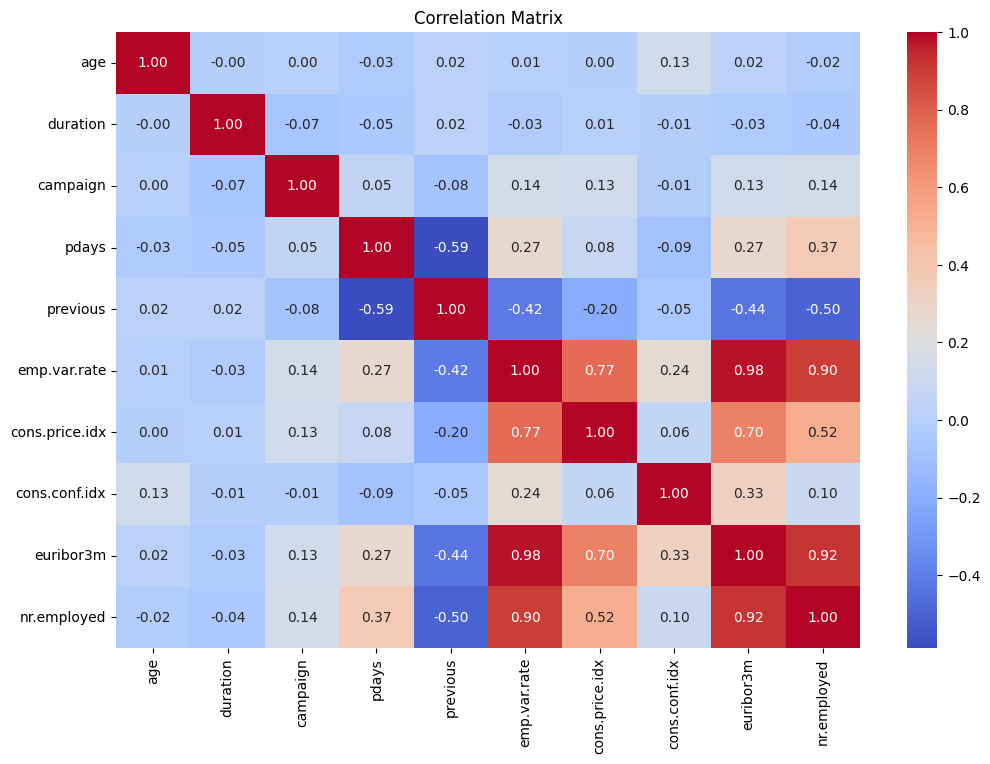

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Multivariate Analysis
# correlation matrix for numerical features
numerical_features = bank_full.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
corr_matrix = bank_full[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



Plotting some pair plots, which contain scatter plots that include distribution of target value "y".

From plots below we can see that:
"age" and "duration" have no clear trend, suggesting age does not influence call duration significantly.
"age" and "previous", higher previous contacts occur across all age ranges but are more common in middle-aged clients.

"duration" attribute has strong influence on "y", which explains the assumption that longer calls are associated with a higher likelihood of subscription.

"duration" and "campaign" Short durations correspond to higher campaign counts, possibly it means that less long calls result in unsuccessful campaigns.

Higher campaign counts are associated with fewer subscriptions (y = yes),so repeated contacts might be ineffective.


Most clients have "pdays" = 999, that means no prior contact.
Shorter pdays are more likely to lead to y = yes.

Low "campaign" count with high "previous" suggests that fewer prior interactions are more effective.

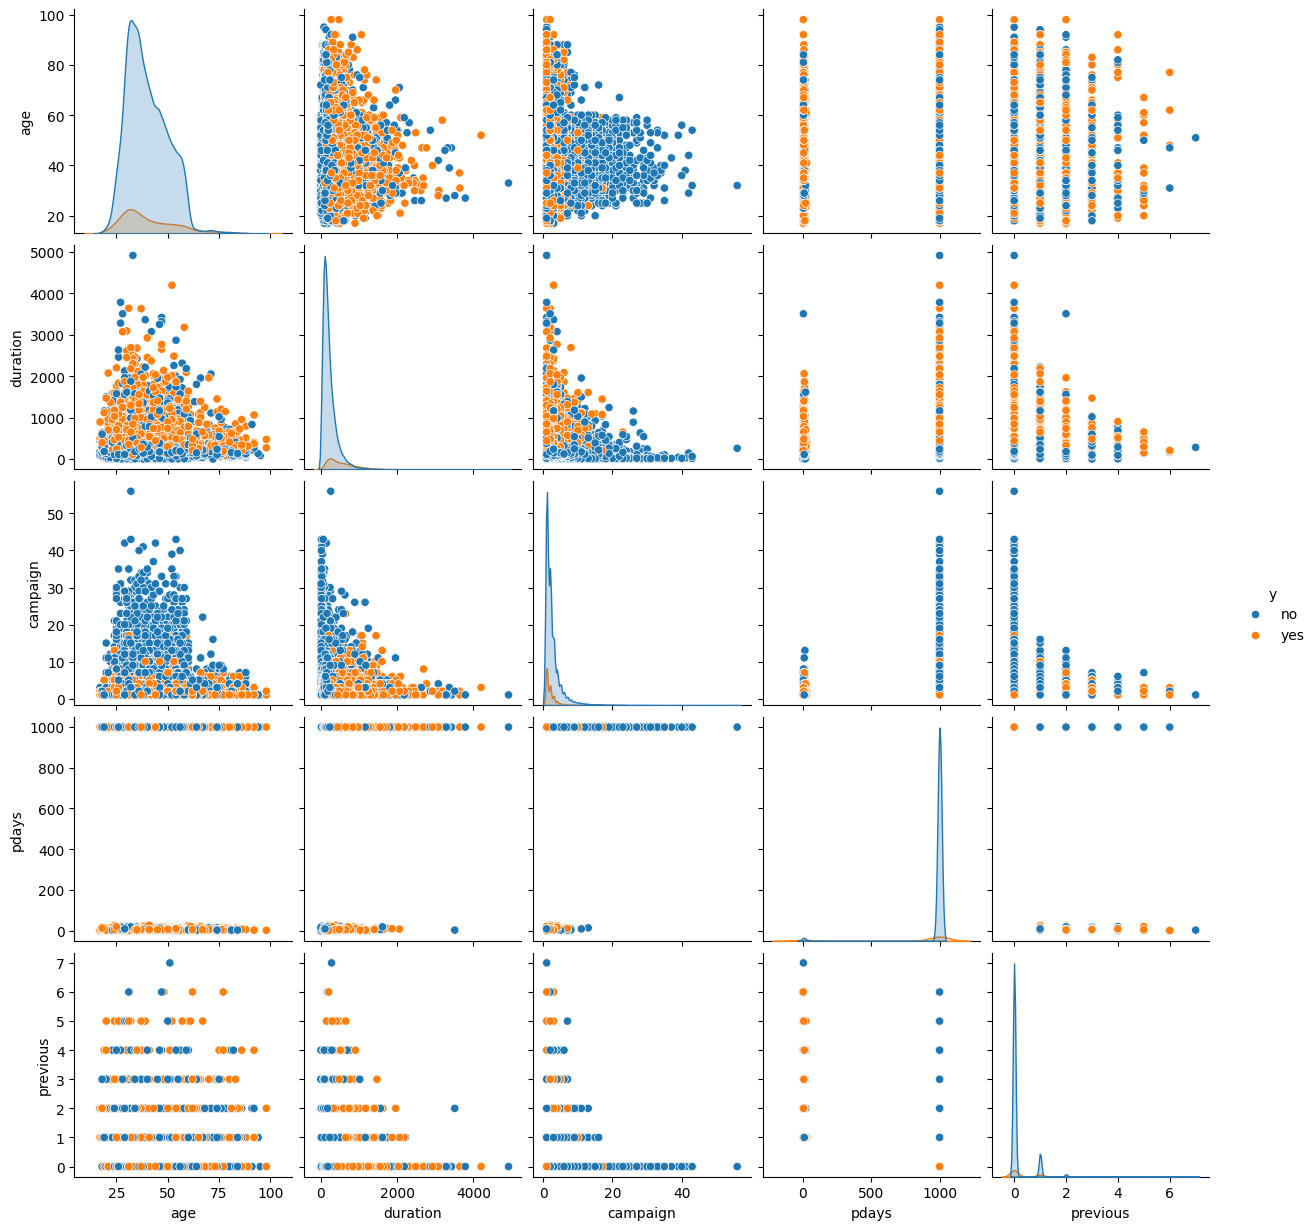

In [62]:
numerical_features = bank_full.select_dtypes(include=['int64', 'float64']).columns

# Pair plots for selected features
sns.pairplot(bank_full, vars=numerical_features[:5], hue='y') #
plt.show()

Feature engineering: creating new features


Below are represented few added features, created from combinig some current features from dataset.

Employment confidence - created by adding nr.employed (number of employees) and cons.conf.idx (consumer confidence index).
Indicates overall confidence in the market and consumer sentiment.
From chart we see that there is a peak at high values indicating generally high employment and confidence.


Another feature introducesd is Success Ratio, which is calculated as the ratio of previous (number of prior contacts) to (campaign + 1) (number of campaign calls).
Represents the effectiveness of previous calls relative to the number of contacts made.

The distribution is heavily right-skewed, with most values clustered near zero, which means that for most records, the success of prior contacts relative to campaign efforts is low.

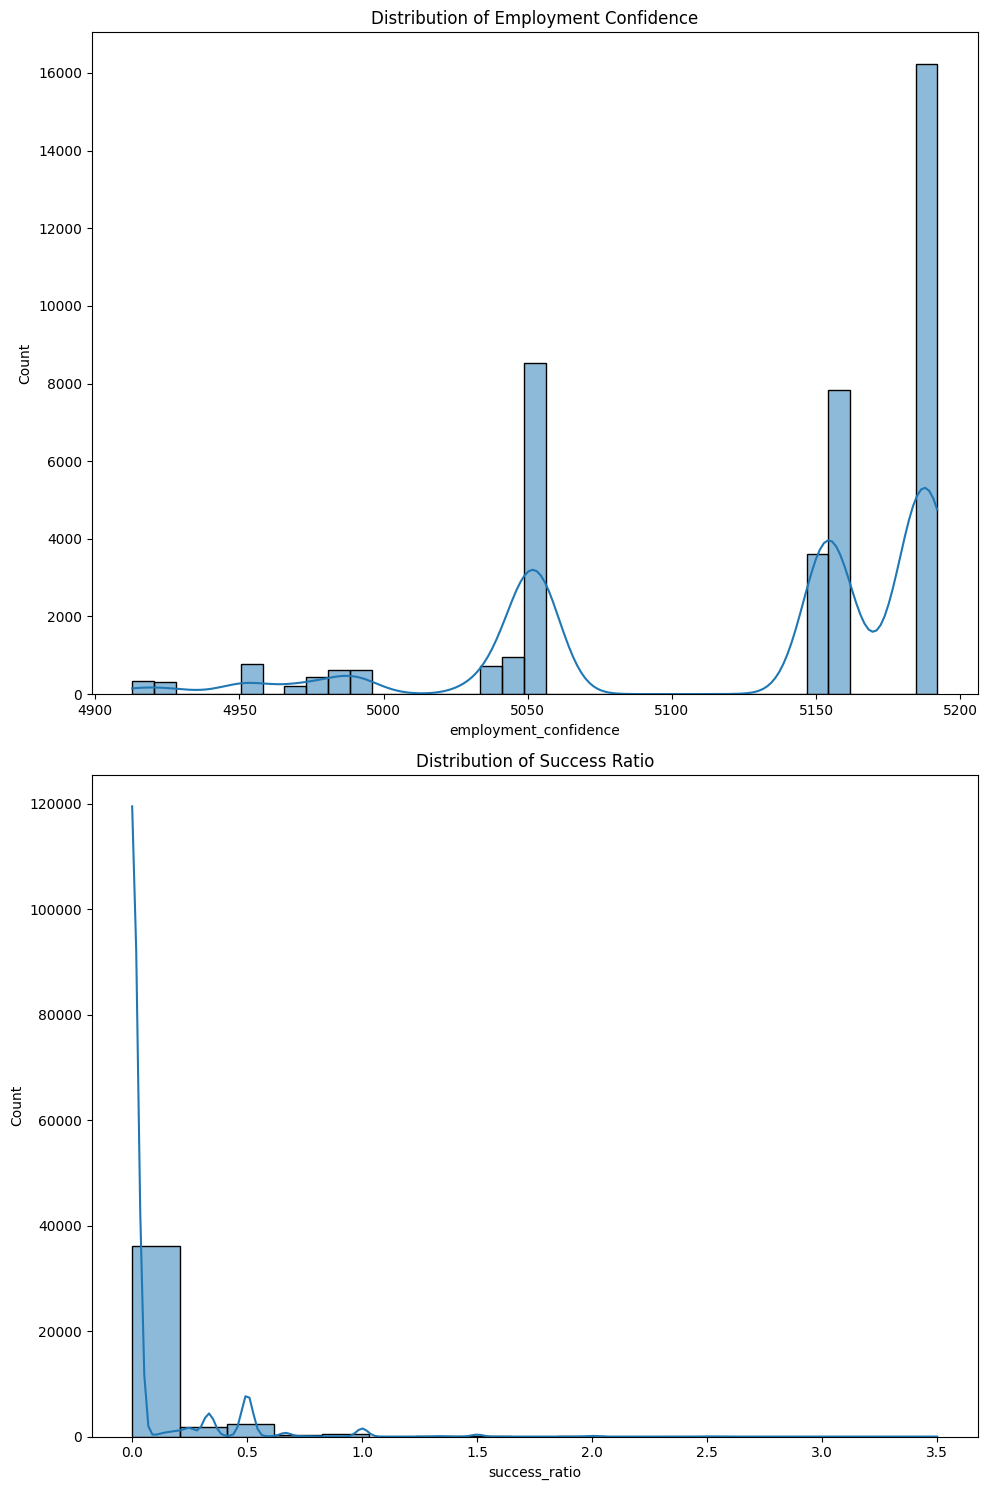

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the new features

bank_full['employment_confidence'] = bank_full['nr.employed'] + bank_full['cons.conf.idx']
bank_full['success_ratio'] = bank_full['previous'] / (bank_full['campaign'] + 1)

fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Plot Employment Confidence
sns.histplot(bank_full['employment_confidence'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Employment Confidence')

# Plot Success Ratio
sns.histplot(bank_full['success_ratio'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Success Ratio')
plt.tight_layout()
plt.show()



Printing Skewness and Kurtosis

age: Skewness of 0.78 indicates moderate right skewness. Most clients are younger (30–40), with fewer older clients.

duration: Skewness of 3.26 indicates strong right skewness. Many calls are short, but some outliers exist with very long durations.

campaign: Skewness of 4.76 shows extreme right skewness. Most clients were contacted fewer times, but some were contacted unusually often.

pdays: Skewness of -4.92 indicates strong left skewness. The large number of pdays=999 dominates the distribution.

Other features have low or moderate skewness, indicating relatively symmetric distributions.

duration and campaign:
Extremely high kurtosis  indicates the presence of heavy tails and extreme outliers. A small number of very high values inflate kurtosis.

pdays:
Kurtosis of 22.23 also suggests a heavy-tailed distribution dominated by outliers (pdays=999).

previous:
Kurtosis of 20.11 indicates a highly peaked distribution with a few extreme values.

Economic features have kurtosis around
0 and distributions suggest these variables are relatively well-behaved and close to normal.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import skew, kurtosis




### Skewness and Kurtosis ###
for column in bank_full.select_dtypes(include=['float64', 'int64']).columns:
    column_skewness = skew(bank_full[column])
    column_kurtosis = kurtosis(bank_full[column])
    kurtosis_type = "Mesokurtic" if abs(column_kurtosis) < 3 else ("Leptokurtic" if column_kurtosis > 3 else "Platykurtic")
    print(f"{column}:")
    print(f"  Skewness: {column_skewness:.2f}")
    print(f"  Kurtosis: {column_kurtosis:.2f} ({kurtosis_type})")
    print("---")




age:
  Skewness: 0.78
  Kurtosis: 0.79 (Mesokurtic)
---
duration:
  Skewness: 3.26
  Kurtosis: 20.25 (Leptokurtic)
---
campaign:
  Skewness: 4.76
  Kurtosis: 36.98 (Leptokurtic)
---
pdays:
  Skewness: -4.92
  Kurtosis: 22.23 (Leptokurtic)
---
previous:
  Skewness: 3.83
  Kurtosis: 20.11 (Leptokurtic)
---
emp.var.rate:
  Skewness: -0.75
  Kurtosis: -1.17 (Mesokurtic)
---
cons.price.idx:
  Skewness: -0.23
  Kurtosis: -0.83 (Mesokurtic)
---
cons.conf.idx:
  Skewness: 0.30
  Kurtosis: -0.36 (Mesokurtic)
---
euribor3m:
  Skewness: -0.69
  Kurtosis: -1.47 (Mesokurtic)
---
nr.employed:
  Skewness: -1.04
  Kurtosis: -0.00 (Mesokurtic)
---
employment_confidence:
  Skewness: -1.00
  Kurtosis: -0.17 (Mesokurtic)
---
success_ratio:
  Skewness: 4.38
  Kurtosis: 27.68 (Leptokurtic)
---


Drawing box plots below to see the outliers, we see that "duration" feature clearly has outliers in duration > 3000. Since high duration is highly correlated with target value, and longer duration usually results in client to get subscribed, then probably it's not the best choice to drop these outliers, but to reduce skewness I cn just use log scalling to this feature.

Regarding, the "campaign" feature, it also contains outliers, which might be beneficial to drop as higher number of "campaign" is usually associated with "no" value of "y" as we seen from pair plots, so in this case it could help balance data according to target.

"pdays" can also be log-scalled, to reduce influence of such big numbers.


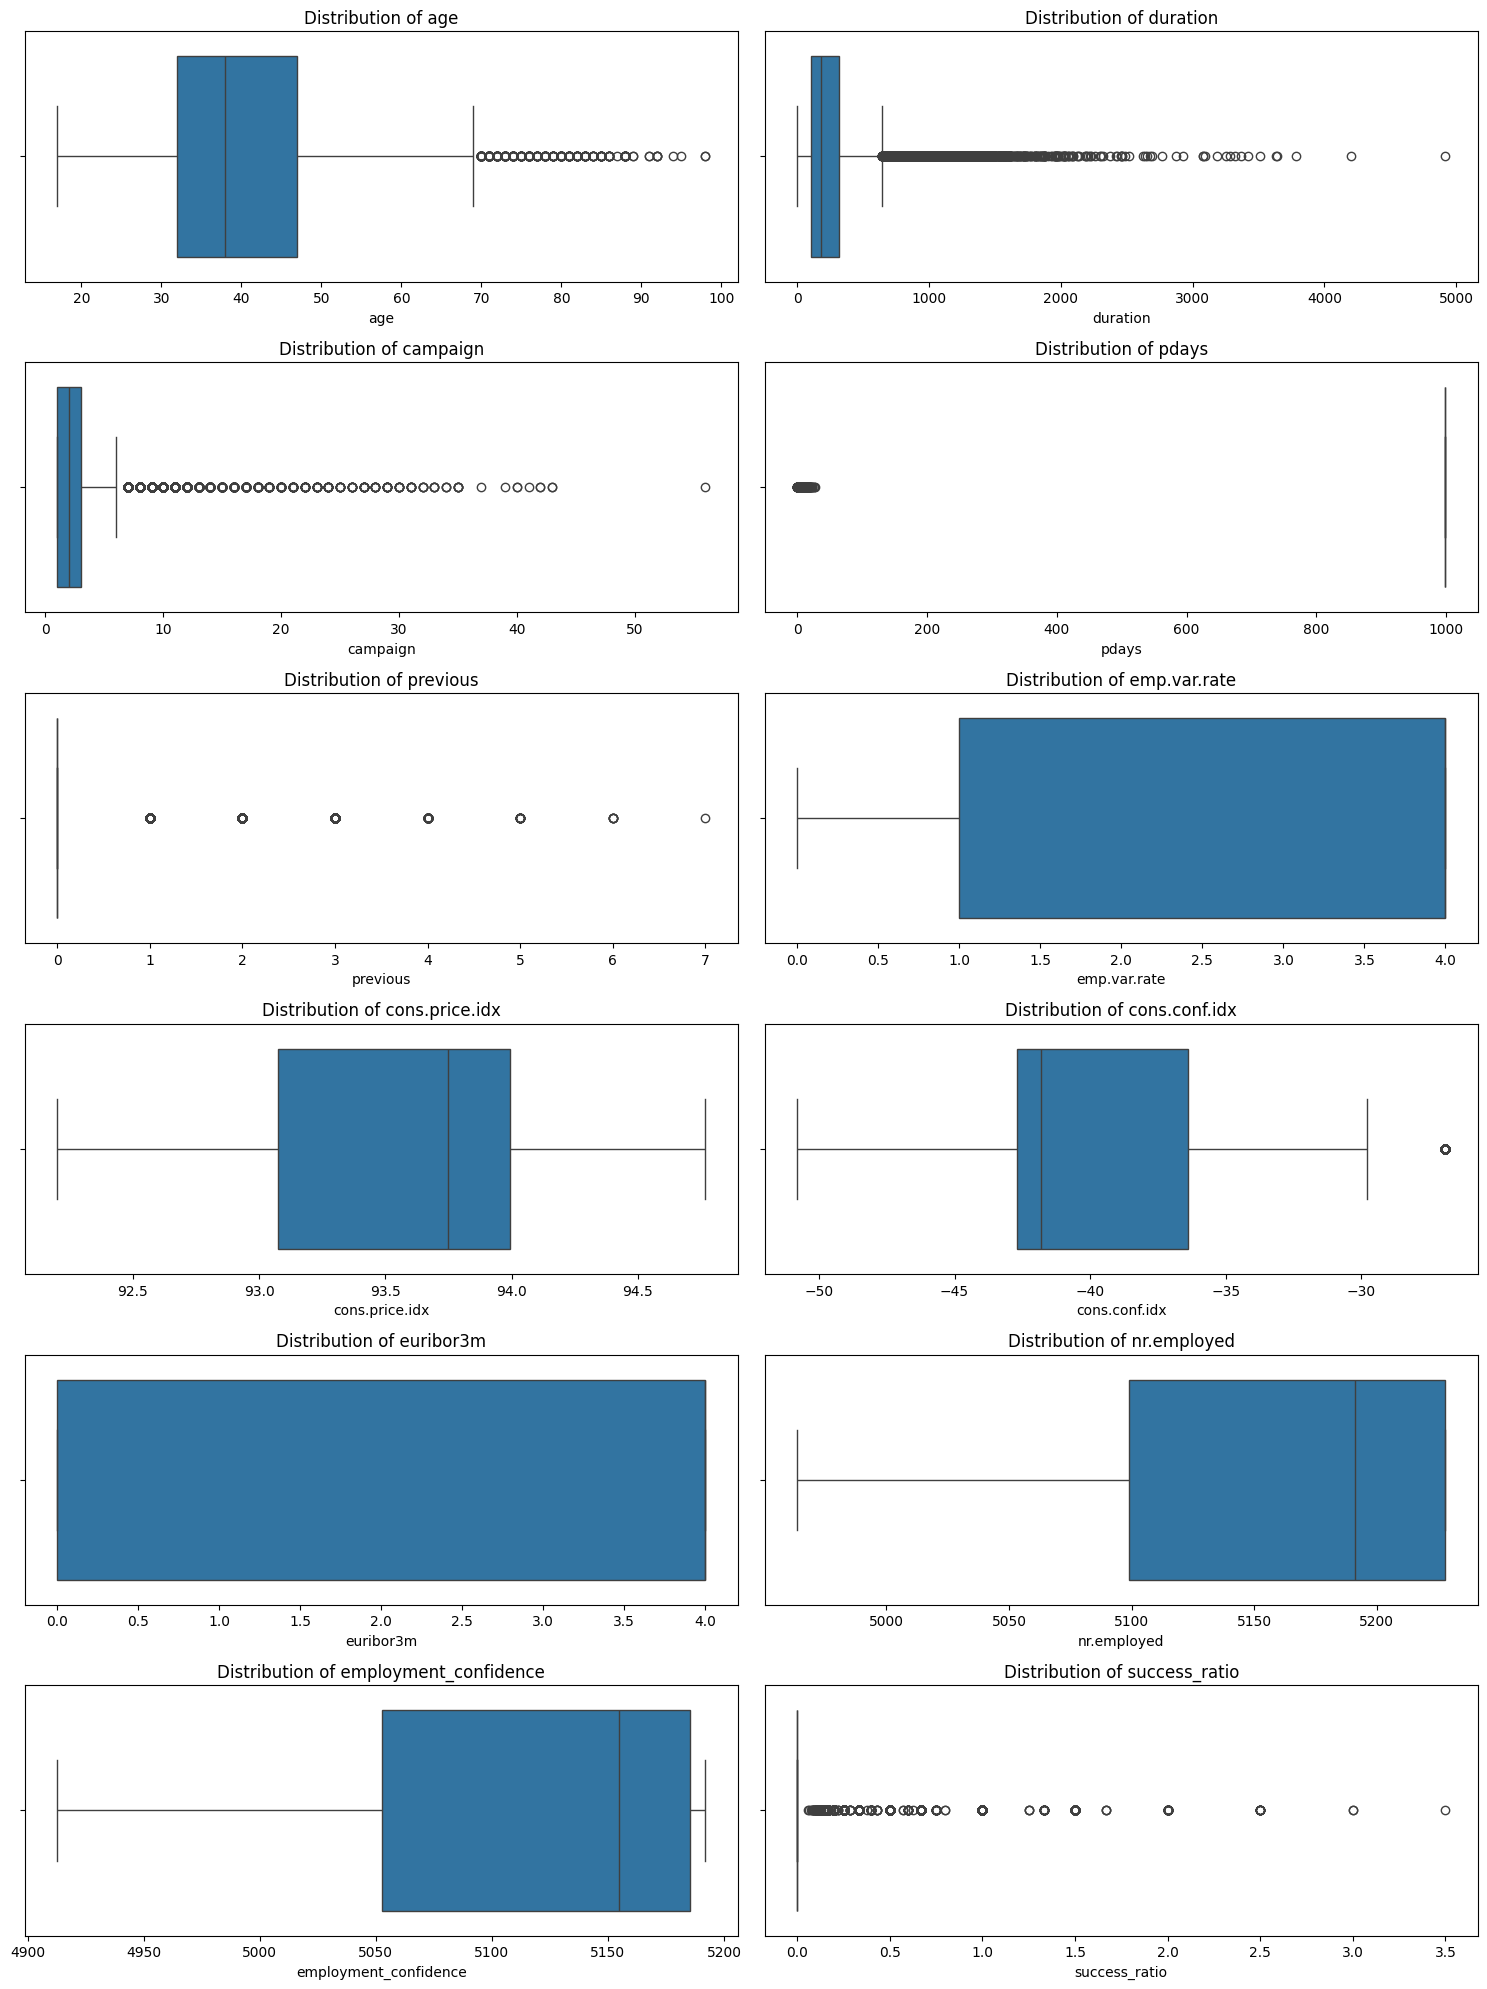

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = bank_full.select_dtypes(include=['float64', 'int64']).columns
# Set up subplots for boxplots
num_plots = len(numerical_features)
rows, cols = 6, 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    if i < len(numerical_features):
        sns.boxplot(data=bank_full, x=feature, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_ylabel('')
    else:
        axes[i].axis('off')
plt.tight_layout()
plt.show()


So, here below is used Interquartile range to drop outliers from "campaign" feature.

In [54]:
def remove_outliers_iqr(df, column):
    # calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # filter out rows with outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df



bank_full = remove_outliers_iqr(bank_full, 'campaign')
##bank_full = remove_outliers_iqr(bank_full, 'duration')
#bank_full = remove_outliers_iqr(bank_full, 'pdays')
#bank_full = remove_outliers_iqr(bank_full, 'success_ratio')

Below, i will use log-scalling for "duration", "pdays"

In [55]:
import numpy as np

columns_to_scale = ['duration', 'pdays']

bank_full[columns_to_scale] = bank_full[columns_to_scale].apply(np.log1p)



For the rest numerical features keeping outliers might be beneficial, but still apply scalling is useful, so I will apply standard scaller to them. It is done to reduce dominance of particular feature during dimensionality reduction.

In [56]:
import numpy as np

columns_to_scale = ['duration', 'pdays']

from sklearn.preprocessing import StandardScaler

# List of remaining numerical features (excluding already log-transformed ones)
remaining_features = ['age', 'campaign', 'previous', 'emp.var.rate',
                      'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'employment_confidence', 'success_ratio']

scaler = StandardScaler()

# apply scaling to remaining numerical features
bank_full[remaining_features] = scaler.fit_transform(bank_full[remaining_features])


scaled_stats = bank_full.describe()
print(scaled_stats)



                age      duration      campaign         pdays      previous  \
count  3.878200e+04  38782.000000  3.878200e+04  38782.000000  3.878200e+04   
mean  -2.169260e-16      5.212268  1.436402e-16      6.711027 -1.172573e-16   
std    1.000013e+00      0.875589  1.000013e+00      0.986706  1.000013e+00   
min   -2.202909e+00      0.000000 -8.156122e-01      0.000000 -3.575995e-01   
25%   -7.672433e-01      4.672829 -8.156122e-01      6.907755 -3.575995e-01   
50%   -1.929769e-01      5.220356 -3.452093e-02      6.907755 -3.575995e-01   
75%    6.684227e-01      5.780744  7.465704e-01      6.907755 -3.575995e-01   
max    5.549687e+00      8.500861  3.089844e+00      6.907755  1.350884e+01   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  3.878200e+04    3.878200e+04   3.878200e+04  3.878200e+04   
mean   4.690293e-17    1.590009e-14  -4.690293e-16 -4.690293e-17   
std    1.000013e+00    1.000013e+00   1.000013e+00  1.000013e+00   
min   -2.173017e

Below is represented imputation of "education" feature by using "job" values (excluding "unknown").
THis is done with assumption that some jobs are required to heva some level of education for them to hold, and some - not.

In [57]:
import pandas as pd

# impute "unknown" in 'education' with the most frequent education for each 'job'
def impute_education(row, mode_by_job):
    if row['education'] == 'unknown':
        return mode_by_job.get(row['job'], 'unknown')  # default to 'unknown' if job mode not found
    return row['education']

# calculate the mode of education for each job (excluding 'unknown')
mode_by_job = (
    bank_full[bank_full['education'] != 'unknown']
    .groupby('job')['education']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')
    .to_dict()
)


bank_full['education'] = bank_full.apply(lambda row: impute_education(row, mode_by_job), axis=1)

print(bank_full['education'].unique())


['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']


Below is done processing of categorical values.
For binary features like default, loan, and housing,instead of imputing with some values "unknown", I just decided to assign a new category such as -1.
Nominal features will be processed by using one hot encoding, so "unknown" value here will hold its own column, so still we can use it without imputation.

In [58]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# binary encoding for binary variables
binary_columns = ['default', 'housing', 'loan', 'y']
for col in binary_columns:
    bank_full[col] = bank_full[col].map({'yes': 1, 'no': 0, 'unknown': -1})

# ordinal encoding for ordinal variables
ordinal_columns = ['education']
education_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
                   'high.school', 'professional.course', 'university.degree']
ordinal_encoder = OrdinalEncoder(categories=[education_order])
bank_full[ordinal_columns] = ordinal_encoder.fit_transform(bank_full[ordinal_columns])

# one-hot encoding for nominal variables
nominal_columns = ['job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome']
bank_full = pd.get_dummies(bank_full, columns=nominal_columns, drop_first=True)


print("Processed DataFrame:")
print(bank_full.head())


Processed DataFrame:
        age  education  default  housing  loan  duration  campaign     pdays  \
0  1.529822        2.0        0        0     0  5.568345 -0.815612  6.907755   
1  1.625533        5.0       -1        0     0  5.010635 -0.815612  6.907755   
2 -0.288688        5.0        0        1     0  5.424950 -0.815612  6.907755   
3 -0.001555        3.0        0        0     0  5.023881 -0.815612  6.907755   
4  1.529822        5.0        0        0     1  5.730100 -0.815612  6.907755   

   previous  emp.var.rate  ...  month_may  month_nov  month_oct  month_sep  \
0   -0.3576       0.67277  ...       True      False      False      False   
1   -0.3576       0.67277  ...       True      False      False      False   
2   -0.3576       0.67277  ...       True      False      False      False   
3   -0.3576       0.67277  ...       True      False      False      False   
4   -0.3576       0.67277  ...       True      False      False      False   

   day_of_week_mon  day_of_we

## 3. Dimensionality reduction

By applying PCA as dimensionality reduction I will keep 95% variance, which results in preserving 20 components from entire dataset.


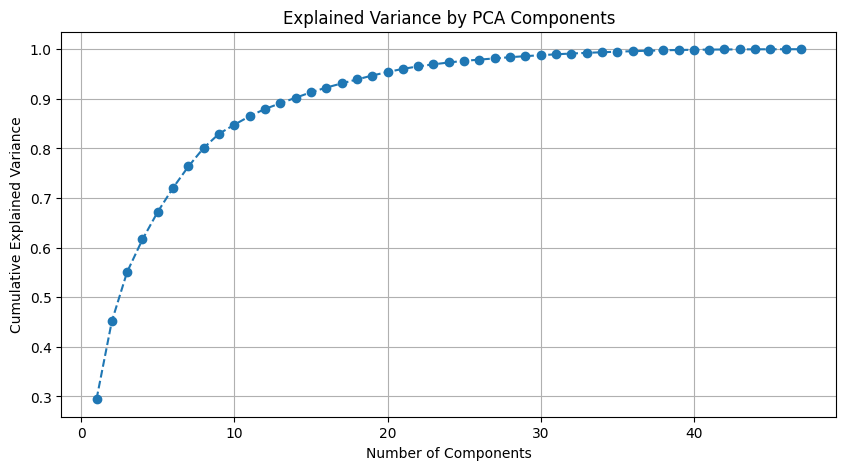

Number of components to explain 95% variance: 20


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split


# 95% of variance
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(bank_full)
reduced = pca.transform(bank_full)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Select the best number of components (e.g., 95% variance)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components}")


As we see below, there is no distinct separation of target values. PCA alone not fully differentiates the target classes as it focuses on maximizing variance without explicitly considering the target variable.


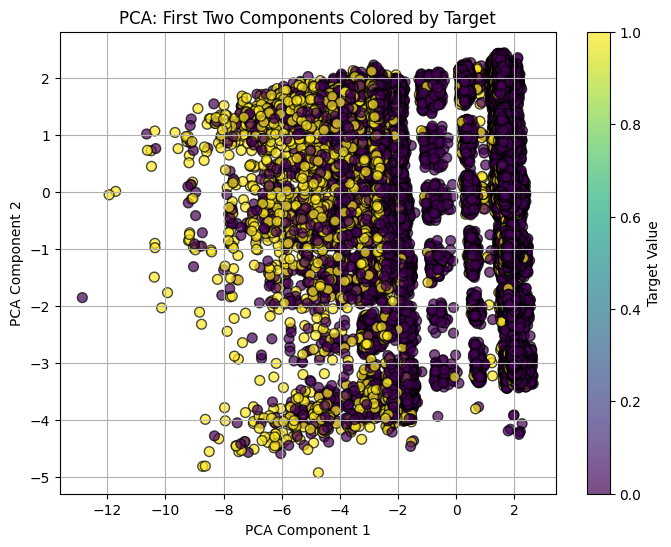

In [60]:

# apply PCA with optimal number of components
pca_optimal = PCA(n_components=n_components)
X_pca = pca_optimal.fit_transform(bank_full)

target = bank_full['y']

# visualize the first two PCA components with color-coded target values
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.colorbar(scatter, label='Target Value')
plt.title('PCA: First Two Components Colored by Target')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()



Below is applied UMAP. Visualization shows that dats is more clustered, but it does not show a strong separation between target values.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


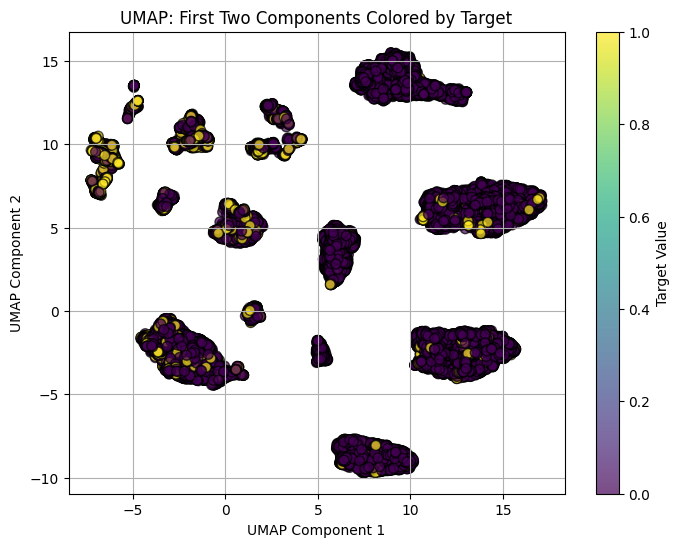

In [61]:
import umap
# initialize and fit UMAP
umap_reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=42, target_metric='categorical', target_weight=0.5)  # 'categorical' for classification tasks

X_umap = umap_reducer.fit_transform(bank_full)

# Visualize UMAP components colored by target
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=target, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.colorbar(scatter, label='Target Value')
plt.title('UMAP: First Two Components Colored by Target')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid()
plt.show()

Below are calculated some scores to define if data is separated into clusters correctly.

 Silhouette score is very low , indicating that the clusters formed by UMAP are not well-separated, and the data points are not strongly associated with their respective clusters.
  A score of 2.65 for Davies-Bouldin Index is  high, further confirming that the UMAP clusters overlap significantly.

In [62]:
from sklearn.metrics import silhouette_score
target = bank_full['y']


silhouette = silhouette_score(X_umap, target)
print(f"Silhouette Score: {silhouette:.2f}")


Silhouette Score: 0.10


In [63]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X_umap, target)
print(f"Davies-Bouldin Index: {db_score:.2f}")


Davies-Bouldin Index: 2.65


Then ,below is applied liniar discriminant analysis, which resulted in creating better-separated clusters that align more closely with the target classes. And the silhuete score is significsntly better than for previous approach.

Number of classes in the target: 2


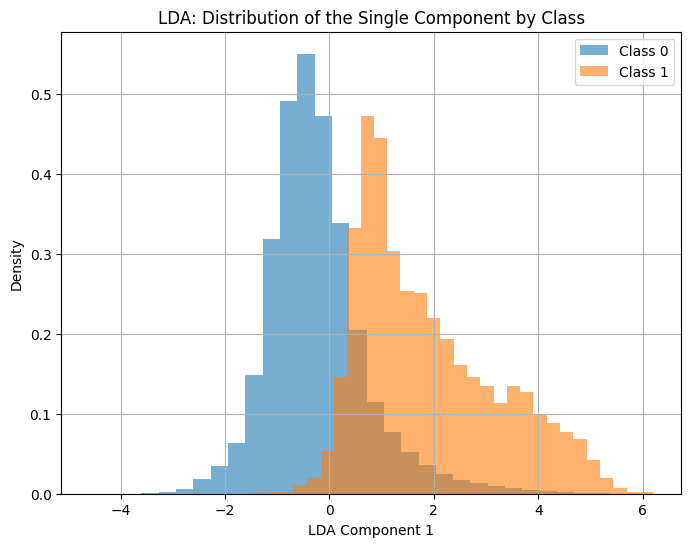

Explained Variance Ratio by LDA Components: [1.]


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


target = bank_full['y']
num_classes = len(target.unique())
print(f"Number of classes in the target: {num_classes}")


bank_full1 = bank_full.drop(columns = ['y'])

# Apply LDA
lda = LDA(n_components=1)  # Use n_components = number of classes - 1 (max for LDA)
X_lda = lda.fit_transform(bank_full1, target)

# Visualize LDA components (single dimension) with a KDE plot or histogram
plt.figure(figsize=(8, 6))
for cls in np.unique(target):
    plt.hist(
        X_lda[target == cls],
        bins=30,
        alpha=0.6,
        label=f"Class {cls}",
        density=True,
    )
plt.title('LDA: Distribution of the Single Component by Class')
plt.xlabel('LDA Component 1')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Evaluate LDA explained variance ratio
explained_variance_ratio = lda.explained_variance_ratio_
print(f"Explained Variance Ratio by LDA Components: {explained_variance_ratio}")

In [67]:
from sklearn.metrics import silhouette_score
target = bank_full['y']


silhouette = silhouette_score(X_lda, target)
print(f"Silhouette Score for LDA: {silhouette:.2f}")

Silhouette Score for LDA: 0.48
